# PROJECT 1
From the 'Project1.pdf' we have the following:

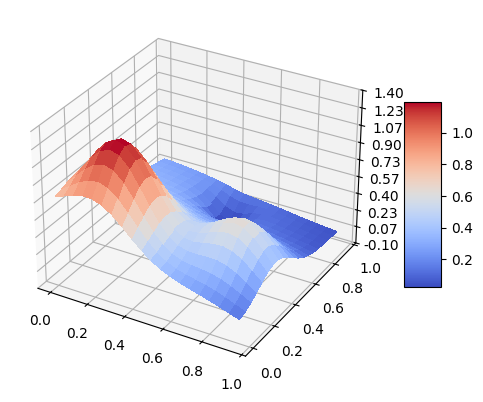

In [65]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
from random import random, seed

fig = plt.figure()
ax = fig.add_subplot(projection = '3d')
# Make data.
x = np.arange(0, 1, 0.05)
y = np.arange(0, 1, 0.05)
x, y = np.meshgrid(x,y)

def FrankeFunction(x,y):
    term1 = 0.75*np.exp(-(0.25*(9*x-2)**2) - 0.25*((9*y-2)**2))
    term2 = 0.75*np.exp(-((9*x+1)**2)/49.0 - 0.1*(9*y+1))
    term3 = 0.5*np.exp(-(9*x-7)**2/4.0 - 0.25*((9*y-3)**2))
    term4 = -0.2*np.exp(-(9*x-4)**2 - (9*y-7)**2)
    return term1 + term2 + term3 + term4

z = FrankeFunction(x, y)

# Plot the surface.
surf = ax.plot_surface(x, y, z, cmap=cm.coolwarm,
linewidth=0, antialiased=False)
# Customize the z axis.
ax.set_zlim(-0.10, 1.40)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

In [67]:
#x,y

## Part a) : Ordinary Least Square (OLS) on the Franke function.

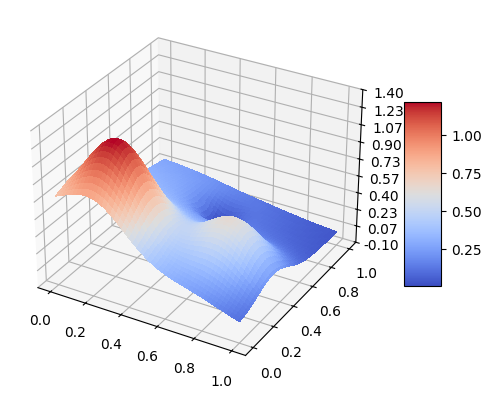

In [2]:
np.random.seed(0)

# Make data
# use FrankeFunction provided in the Project pdf and adapt to include noise
n = 100
x1 = np.linspace(0, 1, n)
x2 = np.linspace(0, 1, n)
x1m, x2m = np.meshgrid(x1,x2)
'''
FrankeFunction takes as input two coordinates x,y in [0,1].
'''
def FrankeFunction(x,y, noise=0):
    term1 = 0.75*np.exp(-(0.25*(9*x-2)**2) - 0.25*((9*y-2)**2))
    term2 = 0.75*np.exp(-((9*x+1)**2)/49.0 - 0.1*(9*y+1))
    term3 = 0.5*np.exp(-(9*x-7)**2/4.0 - 0.25*((9*y-3)**2))
    term4 = -0.2*np.exp(-(9*x-4)**2 - (9*y-7)**2)
    return term1 + term2 + term3 + term4 + noise*np.random.normal(0, 1, (n,n))

y = FrankeFunction(x1m,x2m,0) # row ~ x2, column ~ x1

''' from Project1.pdf'''
fig = plt.figure()
ax = fig.add_subplot(projection = '3d')
# Plot the surface.
surf = ax.plot_surface(x1m, x2m, y, cmap=cm.coolwarm,
linewidth=0, antialiased=False)
# Customize the z axis.
ax.set_zlim(-0.10, 1.40)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

In [3]:
import scipy.special # for binomial coefficient
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

maxdegree = 5


''' WRONG

def data(degree, x1, x2, y):
    degreeplus1 = degree + 1
    
    n = x1.size 
    # 1. setting up design matrix
    # we work here with intercept column
    # the designmatrix s.t. we have the features 1, x1, x2, x1x2, x1^2, x2^2, ....
    # with max totaldegree 5
    # number of possible monoms up to degree 5 for 2 variables is 2+5 choose 5
    num_of_monoms = scipy.special.binom(7, 5)
    X = np.zeros((n, int(num_of_monoms)))
    
    c = 0
    for i in range(degreeplus1):
        for j in range(degreeplus1 - i):
            X[:,c] = x1**i * x2**j
            print('{} {}'.format(i,j))
            print(X[:,c])
            c += 1
            # MUSS MAN NICHT VLLT DAS SO MACHEN, DASS alli X1i und alle X2i kombis auftreten ?
            

    # split the data in test and training data
    X_train, X_test, y_train, y_test = train_test_split(X, y)

    # scaling of training data
    X_train_mean = np.mean(X_train, axis=0)
    X_train_scaled = X_train - X_train_mean
    y_train_mean = np.mean(y_train)
    y_train_scaled = y_train - y_train_mean
    
    #! in order to use beta for test → test has to be scaled by training means !!!
    X_test_scaled = X_test - X_train_mean
    y_test_scaled = y_test - y_train_mean

    return X, X_train, X_test, X_train_scaled, X_test_scaled, y_train_scaled, y_train_mean, y_train, y_test

X, X_train, X_test,  X_train_scaled, X_test_scaled, y_train_scaled, y_train_mean, y_train, y_test = data(degree,x1,x2,y)
'''

" WRONG\n\ndef data(degree, x1, x2, y):\n    degreeplus1 = degree + 1\n    \n    n = x1.size \n    # 1. setting up design matrix\n    # we work here with intercept column\n    # the designmatrix s.t. we have the features 1, x1, x2, x1x2, x1^2, x2^2, ....\n    # with max totaldegree 5\n    # number of possible monoms up to degree 5 for 2 variables is 2+5 choose 5\n    num_of_monoms = scipy.special.binom(7, 5)\n    X = np.zeros((n, int(num_of_monoms)))\n    \n    c = 0\n    for i in range(degreeplus1):\n        for j in range(degreeplus1 - i):\n            X[:,c] = x1**i * x2**j\n            print('{} {}'.format(i,j))\n            print(X[:,c])\n            c += 1\n            # MUSS MAN NICHT VLLT DAS SO MACHEN, DASS alli X1i und alle X2i kombis auftreten ?\n            \n\n    # split the data in test and training data\n    X_train, X_test, y_train, y_test = train_test_split(X, y)\n\n    # scaling of training data\n    X_train_mean = np.mean(X_train, axis=0)\n    X_train_scaled = X_tra

In [4]:
## nochmal anders.. weil ich denke dass X nicht n x ..., sondern n*n x ...
#lastweek
degree = 5

''' generate design matrix without intercept column for flattend x1, x2 '''
def design_no_in(x1f, x2f, degreeplus1):
    n = x1m.size
    # 1. setting up design matrix
    # we work here with intercept column
    # the designmatrix s.t. we have the features 1, x1, x2, x1x2, x1^2, x2^2, ....
    # with max totaldegree 5
    # number of possible monoms up to degree 5 for 2 variables is 2+5 choose 5
    num_of_monoms = scipy.special.binom(degreeplus1 + 1, degreeplus1 -1)
    X = np.zeros((n, int(num_of_monoms))) # afterwards the intercept column is removed
    c = 0
    for i in range(degreeplus1):
        for j in range(degreeplus1 - i):
            X[:,c] = x1f**i * x2f**j
            #print('{} {}'.format(i,j))
            #print(X[:,c])
            #print('x_1^{} * x_2^{}'.format(i,j)) 
            c += 1
    # remove now intercept column
    X = X[:,1:]
    return X
    


'''
generate data for meshgrid (x1m, x2m) and according y. degree is the maximum degree of the
polynomial represented by the designmatrix
'''
def data(degree, x1m, x2m, y):
    degreeplus1 = degree + 1

    x1m_flat = x1m.flatten()
    x2m_flat = x2m.flatten()
    
    X = design_no_in(x1m_flat, x2m_flat, degreeplus1)
    
    # 2. split the data in test and training data
    X_train, X_test, y_train, y_test = train_test_split(X, y.flatten())
 
    # 3. scaling of training data (by subtracting the mean value of each column)
    X_train_mean = np.mean(X_train, axis=0)
    X_train_scaled = X_train  - X_train_mean

    y_train_mean = np.mean(y_train)
    y_train_scaled = y_train - y_train_mean

    # in order to use beta for test → test has to be scaled by training means
    X_test_scaled = X_test - X_train_mean
    #X_test_scaled = X_test - X_train_mean
    y_test_scaled = y_test - y_train_mean

    return X, X_train, X_test, X_train_scaled, X_train_mean, X_test_scaled, y_train_scaled, y_train_mean, y_train, y_test

X, X_train, X_test, X_train_scaled, X_train_mean, X_test_scaled, y_train_scaled, y_train_mean, y_train, y_test = data(degree, x1m, x2m, y)
X.shape

(10000, 20)

TODOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOO !!!!!
You should
present a critical discussion of why and how you have scaled or not
scaled the data

In [529]:
x1m.flatten()

array([0.        , 0.01010101, 0.02020202, ..., 0.97979798, 0.98989899,
       1.        ])

In [439]:
beta_lin = np.linalg.inv(X_train_scaled.T @ X_train_scaled) @ X_train_scaled.T @ y_train_scaled

ypredict_train_LR =  X_train_scaled @ beta_lin + y_train_mean
ypredict_test_LR = X_test_scaled @ beta_lin + y_train_mean
ypredict_all_LR = X @ beta_lin + y_train_mean
'''
def linear(X_train_scaled, X_test_scaled, y_train_scaled, y_train_mean):

    linreg = LinearRegression(fit_intercept=False)
    linreg.fit(X_train_scaled,y_train_scaled)
    
    ypredict_train_LR = linreg.predict(X_train_scaled) + y_train_mean
    ypredict_test_LR = linreg.predict(X_test_scaled) + y_train_mean
    return ypredict_train_LR, ypredict_test_LR

#ypredict_train_LR, ypredict_test_LR = linear(X_train_scaled, X_test_scaled, y_train_scaled, y_train_mean)
'''

'\ndef linear(X_train_scaled, X_test_scaled, y_train_scaled, y_train_mean):\n\n    linreg = LinearRegression(fit_intercept=False)\n    linreg.fit(X_train_scaled,y_train_scaled)\n    \n    ypredict_train_LR = linreg.predict(X_train_scaled) + y_train_mean\n    ypredict_test_LR = linreg.predict(X_test_scaled) + y_train_mean\n    return ypredict_train_LR, ypredict_test_LR\n\n#ypredict_train_LR, ypredict_test_LR = linear(X_train_scaled, X_test_scaled, y_train_scaled, y_train_mean)\n'

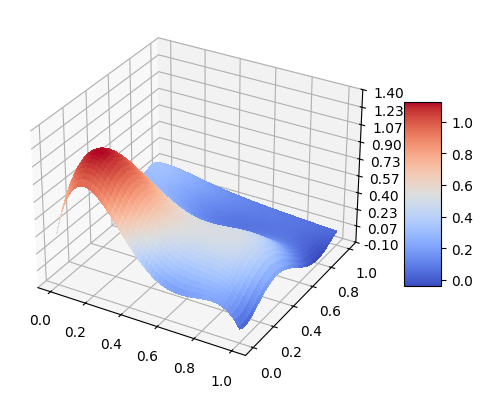

In [440]:
# plotting result
''' from Project1.pdf ''' # adapted

ypredict_all_LR_m = ypredict_all_LR.reshape(y.shape)

fig = plt.figure()
ax = fig.add_subplot(projection = '3d')
# Plot the surface.
surf = ax.plot_surface(x1m, x2m, ypredict_all_LR_m, cmap=cm.coolwarm, linewidth=0, antialiased=False)
# Customize the z axis.
ax.set_zlim(-0.10, 1.40)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

In [441]:
from sklearn.metrics import mean_squared_error,  r2_score

print("Mean squared error for train: {}".format(mean_squared_error(y_train, ypredict_train_LR)))
print('R^2 score for train:          {}'.format(r2_score(y_train, ypredict_train_LR)))
print("Mean squared error for test:  {}".format(mean_squared_error(y_test, ypredict_test_LR)))
print('R^2 score for test:           {}'.format(r2_score(y_test, ypredict_test_LR)))

import pandas as pd

print('summary statistics for train prediction LR')
print(pd.DataFrame(ypredict_train_LR).describe())
print('summary statistics for test prediction LR')
print(pd.DataFrame(ypredict_test_LR).describe())

Mean squared error for train: 0.0020792906601095713
R^2 score for train:          0.9747130534885384
Mean squared error for test:  0.002092253040103122
R^2 score for test:           0.9747120812894298
summary statistics for train prediction LR
                 0
count  7500.000000
mean      0.405415
std       0.283124
min      -0.031529
25%       0.176083
50%       0.331813
75%       0.545648
max       1.146373
summary statistics for test prediction LR
                 0
count  2500.000000
mean      0.404672
std       0.282331
min      -0.031712
25%       0.179684
50%       0.336529
75%       0.541449
max       1.145827


#### Consider the maximum degree 5:

In the case that we don't include any noise when generating the data the following can be observed.
Both for the test and the training data, the mean squared error is about 0.002 (and they differ by less than $3 \cdot 10^{-5}$), and thus, the MSE is very close to zero. This means that the model fits the data it was trained on very good and as it fits the test data as well, the model is not overfitting.
As also both $R^2$ values are about 0.975 (and differ by less than 0.0008), and thus, very close to one, the variation in the response variable is well explained by the model.

In the case that we add a noise with the standard normal distribution to the response data, the observations are different.
The MSE for both the training and test data is about 0.97 (with the MSE for the test data being larger by less than 0.0063). Since the predicted data is between -0.04 and 1.14, the squareroot of the MSE is again close to one, so there is a lot of large variation between the data and the prediction. 
As the $R^2$ score is about 0.0825 for the training and about 0.0682 for the test data, the score implies that the variation is not well described by the model.

In case of noisy data, the previous applies to $n=100$ or $n\geq 70$, where the $n$ refers to the number of obersvations for each of the two coordinates, and thus, the number of obserations is $n^2$. For a smaller number of observations the MSE and R^2 score get worse. For instance, for $n=40$ the MSE for the test data is 1.06 and 0.911 for training, the R^2 is 0.045 for testing and 0.091 for training so it is about twice as bad. Both values tell, that the variation is not well described by the model. 
If however the data is considered without noise, the same MSE and R^2 values apply to the case with $20 \leq n \leq 100$. 

#### Consider maximum degree < 5 (by the following code)

In case of no noise:
If we choose that the maximum degree is equal to one, we see that the MSE both for train and test is about 0.023 and the R^2 value is about 0.72. So the variation in the response variable is to a small extent described by the model, but not well. As the response values are approximately between 0 and 1, the MSE is not very low, but still good.
With rising degree, we can observe that the MSE values get lower and the the R^2 value gets larger, which means that the model explains the outcome better.
Again, considering $n \geq 20$ leads to these results. With lower $n$ value, the results get worse.

If noise is added, the following can be observed for $n \geq 70$. The results are the same as for the case of no noise.


%The MSE both for the test and training data is about 1 and and the R^2 value is about 0.05, if we consider the model of maximum degree one.
%Therefore, the variation in the response is not described by the model and the MSE of 1 is very large, considering that our reponse values lie approximately between 0 and 1.
%Up to maximum degree 5, a very small improvement can be observed in the MSE (it decreases) and the R^2 score (it increases), but it is not of great significance.


#### values of beta
As the models perform good for about $n=100$ we assume this here for the beta values.
Considering the maximum degree 1: beta takes the value -0.66809703 for $x_2$, -0.50331862 for $x_1$, the intercept 0.99181349 and is otherwise zero.
Maximum degree = 2: beta takes the intercept 1.1573594,  -0.7413518 for $x_2$, -0.35731191for $x_2^2$, -1.0087689 for $x_1$, 0.86748016 for $x_1x_2$ and 0.07549784 for $x_1^2$.
Up to degree 5, where we have $$\beta=[  0.39810835 ,  3.77047992 , -8.68362015 , -7.78078923 , 28.61481978,
  -16.12438078 ,  7.80764906, -14.83203881 , 20.12330797 ,-29.16549794,
   16.34422807 ,-34.20616172 , 43.95340149 , -6.84454181 , -5.3433371,
   48.20711402 ,-53.18319323 ,  9.97572767, -23.6426736  , 19.1945245,
    1.47846693],$$ we can observe that the values for beta tend to get larger in their absolute value even in the positions where they correspond to $x_1$ and $x_2$.

In [442]:
0.0021049852262325836 - 0.00207510044393024
0.9752500308178186 - 0.9745251769060062
0.977703887691506 - 0.9714638450379705

a = np.array([1])

### consider now different max degrees

DEGREE = 1


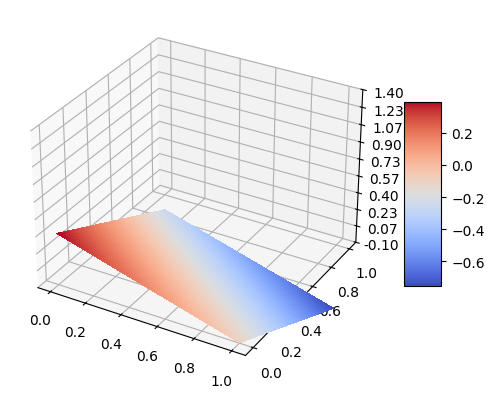

Mean squared error for train: 0.02352371685338569
R^2 score for train:          0.7154156242273213
Mean squared error for test:  0.022843118172818675
R^2 score for test:           0.7194149060979036
summary statistics for train prediction LR
                 0
count  7500.000000
mean      0.406911
std       0.243196
min      -0.178855
25%       0.229776
50%       0.406838
75%       0.584498
max       0.989041
summary statistics for test prediction LR
                 0
count  2500.000000
mean      0.399640
std       0.242728
min      -0.172142
25%       0.224774
50%       0.399874
75%       0.573267
max       0.982329
DEGREE = 2


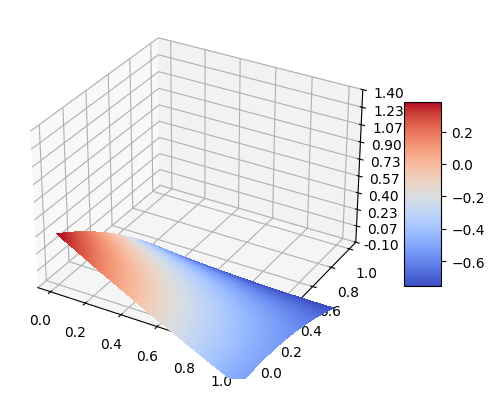

Mean squared error for train: 0.016865596453597063
R^2 score for train:          0.7936527087164573
Mean squared error for test:  0.017556159469447483
R^2 score for test:           0.7913596263436034
summary statistics for train prediction LR
                 0
count  7500.000000
mean      0.402898
std       0.254710
min      -0.006686
25%       0.210277
50%       0.357637
75%       0.570545
max       1.147050
summary statistics for test prediction LR
                 0
count  2500.000000
mean      0.408099
std       0.251660
min      -0.006685
25%       0.219056
50%       0.363632
75%       0.575523
max       1.154629
DEGREE = 3


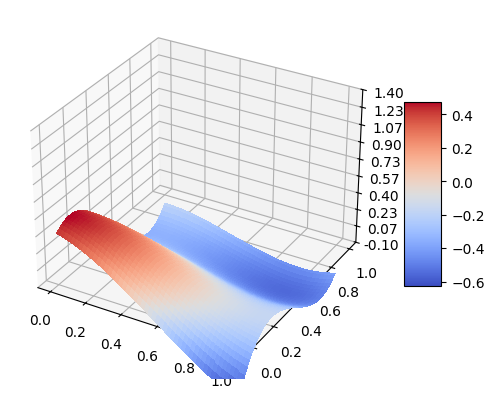

Mean squared error for train: 0.007798552210242132
R^2 score for train:          0.9062292031975406
Mean squared error for test:  0.007785745052519662
R^2 score for test:           0.9025564264351418
summary statistics for train prediction LR
                 0
count  7500.000000
mean      0.406733
std       0.274550
min      -0.097032
25%       0.185754
50%       0.355033
75%       0.596507
max       1.048798
summary statistics for test prediction LR
                 0
count  2500.000000
mean      0.402422
std       0.270556
min      -0.074921
25%       0.190817
50%       0.358820
75%       0.585872
max       1.049740
DEGREE = 4


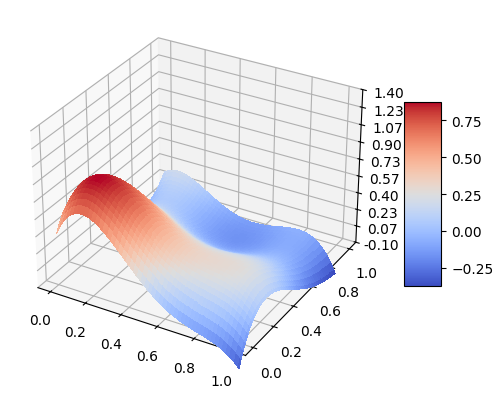

Mean squared error for train: 0.004026803237598108
R^2 score for train:          0.9513988667787343
Mean squared error for test:  0.004243824119727588
R^2 score for test:           0.9474589459315235
summary statistics for train prediction LR
                 0
count  7500.000000
mean      0.408057
std       0.280781
min      -0.174592
25%       0.178759
50%       0.349817
75%       0.562253
max       1.094970
summary statistics for test prediction LR
                 0
count  2500.000000
mean      0.398029
std       0.280718
min      -0.177698
25%       0.168358
50%       0.337004
75%       0.545721
max       1.093220
DEGREE = 5


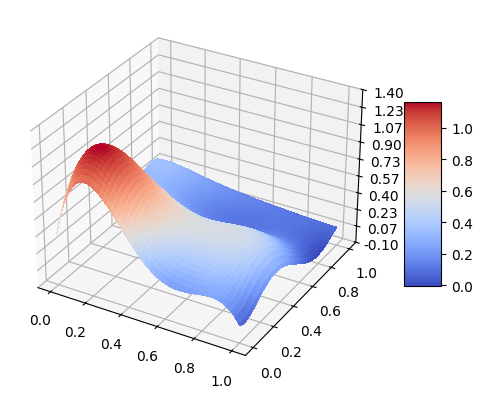

Mean squared error for train: 0.002065320345775556
R^2 score for train:          0.9749341681707856
Mean squared error for test:  0.0021463836043184477
R^2 score for test:           0.9738912982350421
summary statistics for train prediction LR
                 0
count  7500.000000
mean      0.403960
std       0.283445
min      -0.032988
25%       0.175178
50%       0.331111
75%       0.541659
max       1.150594
summary statistics for test prediction LR
                 0
count  2500.000000
mean      0.408319
std       0.282854
min      -0.030244
25%       0.179652
50%       0.332244
75%       0.549070
max       1.149734


In [443]:
y = FrankeFunction(x1m,x2m,0) # row ~ x2, column ~ x1

import scipy.special # for binomial coefficient
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,  r2_score
import pandas as pd

maxdegree = 5


def OLS_analysis(maxdegree):
    degrees = np.arange(1,maxdegree + 1)
    num_monoms = int(scipy.special.binom(maxdegree + 2, maxdegree))

    betas = np.zeros((maxdegree, num_monoms)) # for maxdegree = 5: 7 choose 5 is the number of possible monoms up to degree 5 for 2 variables (not -1 because the intercept will be added)
    MSE = np.zeros((maxdegree,2)) # 0.column for train, 1. for test
    R2 = np.zeros((maxdegree,2))
    for degree in degrees:
        print('DEGREE = ' + str(degree))
        X, X_train, X_test, X_train_scaled, X_train_mean, X_test_scaled, y_train_scaled, y_train_mean, y_train, y_test = data(degree, x1m, x2m, y)
        
        beta_lin = np.linalg.inv(X_train_scaled.T @ X_train_scaled) @ X_train_scaled.T @ y_train_scaled # without intercept
        intercept = y_train_mean - X_train_mean @ beta_lin
        betas[degree-1] = np.hstack([intercept, beta_lin, np.zeros(( num_monoms -1 - beta_lin.size,))])
    
        #print('beta = {}'.format(betas[degree-1]))
        
        ypredict_train_LR =  X_train_scaled @ beta_lin + y_train_mean
        ypredict_test_LR = X_test_scaled @ beta_lin + y_train_mean
        ypredict_all_LR = X @ beta_lin + y_train_mean
        
        ''' from Project1.pdf ''' # adapted
        
        ypredict_all_LR_m = ypredict_all_LR.reshape(y.shape)
        
        fig = plt.figure()
        ax = fig.add_subplot(projection = '3d')
        # Plot the surface.
        surf = ax.plot_surface(x1m, x2m, ypredict_all_LR_m, cmap=cm.coolwarm, linewidth=0, antialiased=False)
        # Customize the z axis.
        ax.set_zlim(-0.10, 1.40)
        ax.zaxis.set_major_locator(LinearLocator(10))
        ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
        # Add a color bar which maps values to colors.
        fig.colorbar(surf, shrink=0.5, aspect=5)
        plt.show()
        ''''''
        
        print("Mean squared error for train: {}".format(mean_squared_error(y_train, ypredict_train_LR)))
        print('R^2 score for train:          {}'.format(r2_score(y_train, ypredict_train_LR)))
        print("Mean squared error for test:  {}".format(mean_squared_error(y_test, ypredict_test_LR)))
        print('R^2 score for test:           {}'.format(r2_score(y_test, ypredict_test_LR)))
    
        MSE[degree-1, 0] = mean_squared_error(y_train, ypredict_train_LR)
        MSE[degree-1, 1] = mean_squared_error(y_test, ypredict_test_LR)
        R2[degree-1, 0] = r2_score(y_train, ypredict_train_LR)
        R2[degree-1, 1] = r2_score(y_test, ypredict_test_LR)
            
        print('summary statistics for train prediction LR')
        print(pd.DataFrame(ypredict_train_LR).describe())
        print('summary statistics for test prediction LR')
        print(pd.DataFrame(ypredict_test_LR).describe())

    return MSE, R2, betas, degrees

MSE, R2, betas, degrees = OLS_analysis(5)

In [394]:
print(betas)

[[  0.98557334  -0.66133327  -0.50045463   0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.        ]
 [  1.15433955  -0.72698521  -0.36613788  -1.01522343   0.85823731
    0.08921628   0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.        ]
 [  0.97314192   1.32680562  -6.41429722   4.49454441  -0.48573394
    1.85380442  -1.39800319  -1.51429584   0.41169047   0.92729024
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.        ]
 [  0.62958921   3.06732288 -12.24029415  12.40841068  -3.51246285
    3.96594293  -1.9466484    1.01646657  -1.65322363 -18.44989074
    7.5831513    0.05362732  24.05396211  -4.80612897 -10.33318234
    0.           0.

<function matplotlib.pyplot.show(close=None, block=None)>

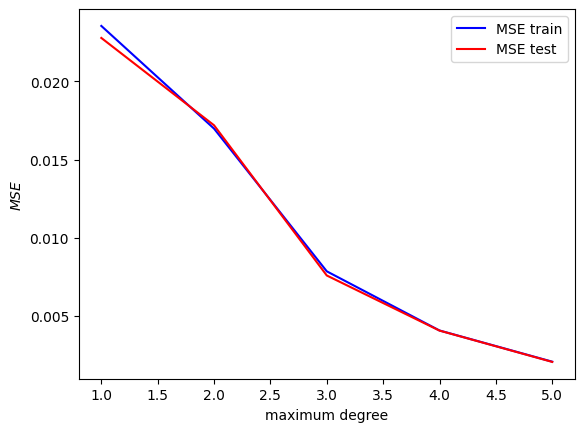

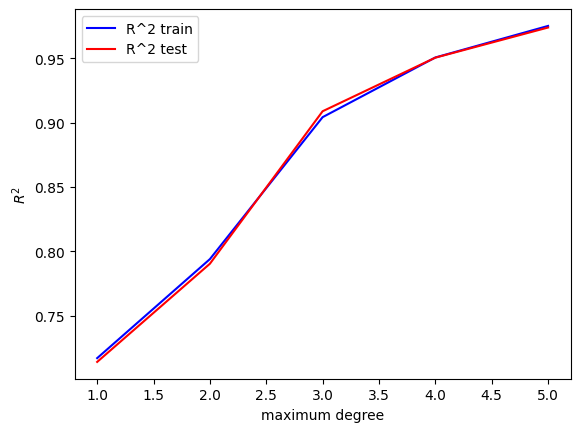

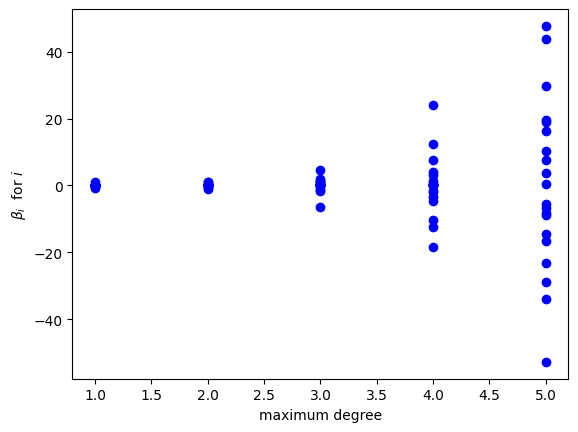

In [390]:
fig = plt.figure()
plt.plot(degrees,MSE[:,0], 'b', label='MSE train')
plt.plot(degrees,MSE[:,1], 'r', label='MSE test')
ax = plt.gca()
ax.legend()
plt.xlabel(r'maximum degree')
plt.ylabel(r'$MSE$')
plt.show

fig = plt.figure()
plt.plot(degrees,R2[:,0], 'b', label='R^2 train')
plt.plot(degrees,R2[:,1], 'r', label='R^2 test')
ax = plt.gca()
ax.legend()
plt.xlabel(r'maximum degree')
plt.ylabel(r'$R^2$')
plt.show

fig = plt.figure()
for i in range(X.shape[1]):
    plt.plot(degrees,betas[:,i], 'bo')
plt.xlabel(r'maximum degree')
plt.ylabel(r'$\beta_i$  for $i$')
plt.show

#### "You should present a critical discussion of why and how you have scaled or not scaled the data"
choice: average
- did not divide by standard deviation as our data has the same scale
- however, subtracted the mean as we don't want to penalize the intercept as we cannot expect it to be zero. This is, because the average value of the function values for and without noise is about 0.4, which in comparison to the data we have is not close to zero. For ridge regression still penalizes the intercept , even though it aims at minimizing the other coefficients more. the same applies to Lasso. (As also discussed in Section 3.4.1 of ESL )

In [391]:
np.mean(FrankeFunction(x1m,x2m,0))

np.float64(0.40536646750048994)

## Part b) : Adding Ridge regression for the Franke function.

In [50]:
np.random.seed(0)

n = 100
x1 = np.linspace(0, 1, n)
x2 = np.linspace(0, 1, n)
x1m, x2m = np.meshgrid(x1,x2)

y = FrankeFunction(x1m,x2m,1)

maxdegree = 5
degrees = np.arange(1,  maxdegree + 1)

Use both for the Ridge and Lasso regression the following lambdas

In [51]:
lambdas = [0.00001, 0.0001, 0.001, 0.01, 0.1,1,10]
num_lambdas = len(lambdas)

In [64]:
import scipy.special # for binomial coefficient
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression , Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,  r2_score
import pandas as pd

y = FrankeFunction(x1m,x2m,0) # row ~ x2, column ~ x1
maxdegree = 5

def Ridge_analysis(lambd):

    num_monoms = int(scipy.special.binom(maxdegree + 2, maxdegree))
    betas = np.zeros((5, num_monoms)) # for maxdegree = 5: 7 choose 5 is the number of possible monoms up to degree 5 for 2 variables
    MSE = np.zeros((5,2)) # 0.column for train, 1. for test
    R2 = np.zeros((5,2))
    
    degrees = np.arange(1,maxdegree + 1)
    for degree in degrees:
        #print('DEGREE = ' + str(degree))
        X, X_train, X_test, X_train_scaled, X_train_mean, X_test_scaled, y_train_scaled, y_train_mean, y_train, y_test = data(degree, x1m, x2m, y)
        
        # RIDGE REGRESSION:
        beta_rr = np.linalg.inv(X_train_scaled.T @ X_train_scaled + lambd*np.identity(X_train_scaled.shape[1])) @ X_train_scaled.T @ y_train_scaled #without intercept
        intercept = y_train_mean - X_train_mean @ beta_rr
        betas[degree-1] = np.hstack([intercept,  beta_rr, np.zeros(( num_monoms  - 1 - beta_rr.size,))])
                
        #print('beta = {}'.format(beta_rr))
        
        ypredict_train_RR =  X_train_scaled @ beta_rr + y_train_mean
        ypredict_test_RR = X_test_scaled @ beta_rr + y_train_mean
        ypredict_all_RR = X @ beta_rr + y_train_mean

        ''' for sake of understanding the functions of sklearn
        # prediction using sklearn
        RegRidge = Ridge(lambd)
        RegRidge.fit(X_train,y_train)
        ypredictRidge = RegRidge.predict(X_test)
        print('difference of y_pred: true - sklearn, not scaled data (but also no intercept column): {}'.format(ypredict_test_RR - ypredictRidge))

        ridge2 = Ridge(lambd, fit_intercept=False)
        ridge2.fit(X_train_scaled,y_train_scaled)
        y_pred2 = ridge2.predict(X_test_scaled) + y_train_mean
        print('difference of y_pred: true - sklearn, scaled data (and also no intercept column): {}'.format(ypredict_test_RR - y_pred2))
        print('difference of differences = {}'.format(ypredictRidge - y_pred2))
        ''' 
        
        ''' from Project1.pdf ''' # adapted

        '''
        ypredict_all_RR_m = ypredict_all_RR.reshape(y.shape)
        
        fig = plt.figure()
        ax = fig.add_subplot(projection = '3d')
        # Plot the surface.
        surf = ax.plot_surface(x1m, x2m, ypredict_all_RR_m, cmap=cm.coolwarm, linewidth=0, antialiased=False)
        # Customize the z axis.
        ax.set_zlim(-0.10, 1.40)
        ax.zaxis.set_major_locator(LinearLocator(10))
        ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
        # Add a color bar which maps values to colors.
        fig.colorbar(surf, shrink=0.5, aspect=5)
        plt.show()
        '''
        
        ''''''
    
        '''
        print("Mean squared error for train: {}".format(mean_squared_error(y_train, ypredict_train_RR)))
        print('R^2 score for train:          {}'.format(r2_score(y_train, ypredict_train_RR)))
        print("Mean squared error for test:  {}".format(mean_squared_error(y_test, ypredict_test_RR)))
        print('R^2 score for test:           {}'.format(r2_score(y_test, ypredict_test_RR)))
        '''
        
        MSE[degree-1, 0] = mean_squared_error(y_train, ypredict_train_RR)
        MSE[degree-1, 1] = mean_squared_error(y_test, ypredict_test_RR)
        R2[degree-1, 0] = r2_score(y_train, ypredict_train_RR)
        R2[degree-1, 1] = r2_score(y_test, ypredict_test_RR)


    return betas, MSE, R2



betas_lam = np.zeros((5, int(scipy.special.binom(maxdegree + 2, maxdegree)), num_lambdas))
MSE_lam = np.zeros((5,2, num_lambdas))
R2_lam = np.zeros((5,2, num_lambdas))

it = 0
for lambd in lambdas:
    betas_lam[:,:,it], MSE_lam[:,:,it], R2_lam[:,:,it] = Ridge_analysis(lambd)
    it += 1


[Text(0.5, 0, 'maximum degree'), Text(0, 0.5, '$\\beta_i$ for $i$')]

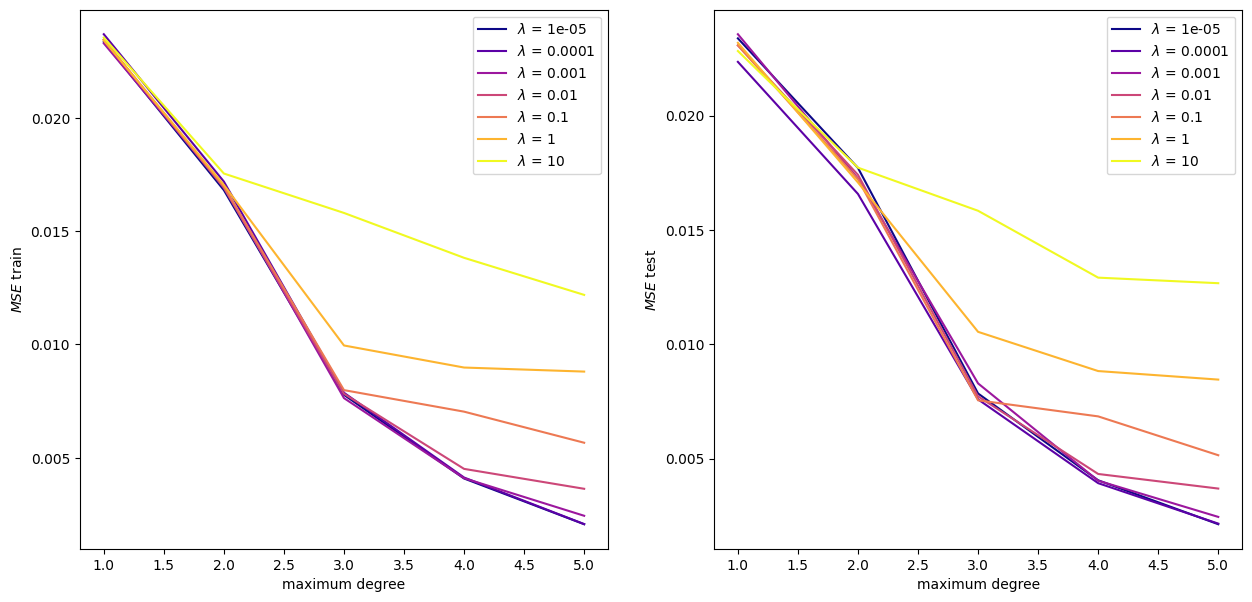

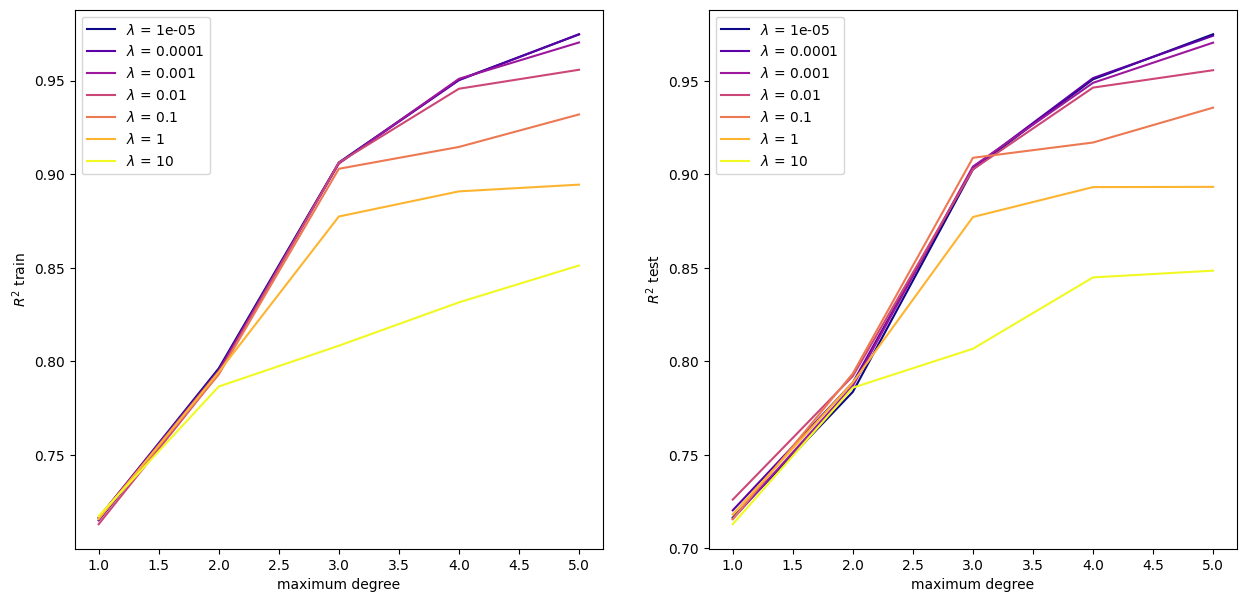

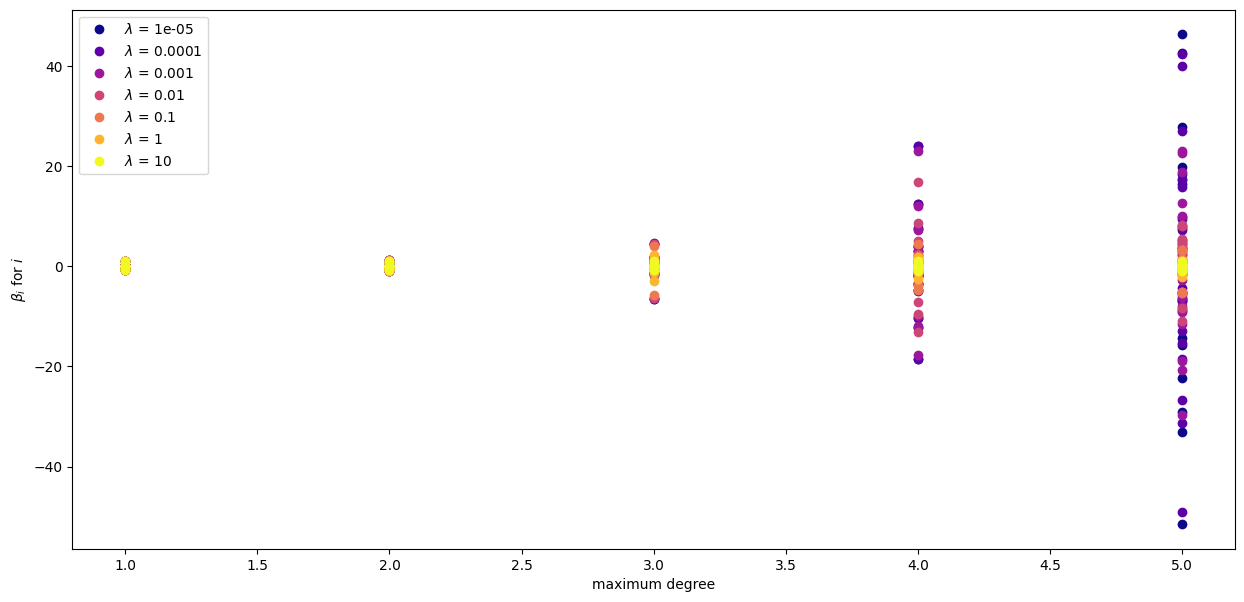

In [53]:
import matplotlib as mpl

# colours for lambdas
cmap = mpl.colormaps['plasma']
# Take colors at regular intervals spanning the colormap.
colors = cmap(np.linspace(0, 1, num_lambdas))

# plot MSE for train, test and lambda values
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
it = 0
for lambd in lambdas:
    axs[0].plot(degrees,MSE_lam[:,0, it], c = colors[it], label=r'$\lambda$ = {}'.format(lambd))
    axs[1].plot(degrees,MSE_lam[:,1, it], c = colors[it], label=r'$\lambda$ = {}'.format(lambd))
    it += 1

axs[0].legend()
axs[1].legend()
axs[0].set(xlabel =r'maximum degree', ylabel= r'$MSE$ train')
axs[1].set(xlabel =r'maximum degree', ylabel= r'$MSE$ test')


# plot R^2 for train and test  and lambda values
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
it = 0
for lambd in lambdas:
    axs[0].plot(degrees,R2_lam[:,0, it], c = colors[it], label=r'$\lambda$ = {}'.format(lambd))
    axs[1].plot(degrees,R2_lam[:,1, it], c = colors[it], label=r'$\lambda$ = {}'.format(lambd))
    it += 1

axs[0].legend()
axs[1].legend()
axs[0].set(xlabel =r'maximum degree', ylabel= r'$R^2$ train')
axs[1].set(xlabel =r'maximum degree', ylabel= r'$R^2$ test')


# TODO THIS IS STILL SHIIIT → MAKE SUBPLOTS FOR EVER LAMBDA !!!!
# plot beta for lambda values
fig = plt.figure(figsize=(15, 7))
axs = plt.gca()
# TODO → get a list that has a colour for each lambda
it = 0
for lambd in lambdas:
    axs.plot(degrees,betas_lam[:,0, it], marker='o', linestyle='', c = colors[it], label=r'$\lambda$ = {}'.format(lambd))
    for i in range(1,X.shape[1]):
        axs.plot(degrees,betas_lam[:,i, it], marker='o', linestyle='', c = colors[it])
    it += 1

axs.legend()

axs.set(xlabel =r'maximum degree', ylabel= r'$\beta_i$ for $i$')

**TODO**:
- analysis !!! wrt noise / no noise & number n



## Part c): Adding Lasso for the Franke function.

In [61]:
import scipy.special # for binomial coefficient
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,  r2_score
import pandas as pd

y = FrankeFunction(x1m,x2m,0) # row ~ x2, column ~ x1
maxdegree = 5

def Lasso_analysis(lambd):

    num_monoms = int(scipy.special.binom(maxdegree + 2, maxdegree))
    betas = np.zeros((5, num_monoms)) # for maxdegree = 5: 7 choose 5 is the number of possible monoms up to degree 5 for 2 variables
    MSE = np.zeros((5,2)) # 0.column for train, 1. for test
    R2 = np.zeros((5,2))
    
    degrees = np.arange(1,maxdegree + 1)
    for degree in degrees:
        #print('DEGREE = ' + str(degree))
        X, X_train, X_test, X_train_scaled, X_train_mean, X_test_scaled, y_train_scaled, y_train_mean, y_train, y_test = data(degree, x1m, x2m, y)
        
        # LASSO REGRESSION: (without intercept, = 0 thus)
        lasso = Lasso(lambd)
        lasso.fit(X_train,y_train)
        ypredict_train_LA = lasso.predict(X_train)
        ypredict_test_LA = lasso.predict(X_test)

        betas[degree-1] = np.hstack([lasso.intercept_,  lasso.coef_, np.zeros(( num_monoms  - 1 - lasso.coef_.size,))])

        #print('for max degree {}, X.shape {}'.format(degree, X.shape))

        ''' 
        lasso2 = Lasso(lambd, fit_intercept=False)
        lasso2.fit(X_train_scaled,y_train_scaled)
        y_pred2 = lasso2.predict(X_test_scaled) + y_train_mean
        print(ypredict_test_LA - y_pred2)
        ''' 
   
        
        MSE[degree-1, 0] = mean_squared_error(y_train, ypredict_train_LA)
        MSE[degree-1, 1] = mean_squared_error(y_test, ypredict_test_LA)
        R2[degree-1, 0] = r2_score(y_train, ypredict_train_LA)
        R2[degree-1, 1] = r2_score(y_test, ypredict_test_LA)


    return betas, MSE, R2


betas_lam = np.zeros((5, int(scipy.special.binom(maxdegree + 2, maxdegree)), num_lambdas))
MSE_lam = np.zeros((5,2, num_lambdas))
R2_lam = np.zeros((5,2, num_lambdas))

it = 0
for lambd in lambdas:
    betas_lam[:,:,it], MSE_lam[:,:,it], R2_lam[:,:,it] = Lasso_analysis(lambd)
    it += 1

[7.77156117e-16 8.32667268e-16 8.88178420e-16 ... 8.32667268e-16
 7.77156117e-16 7.77156117e-16]
[5.55111512e-16 5.55111512e-16 5.55111512e-16 ... 6.66133815e-16
 3.60822483e-16 5.55111512e-16]


/home/gd/Dokumente/UIOSLO/SE01/FYS_STK4155/jupyternotebooks/sklearn-env/lib64/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.410e+01, tolerance: 6.149e-02
  model = cd_fast.enet_coordinate_descent(
/home/gd/Dokumente/UIOSLO/SE01/FYS_STK4155/jupyternotebooks/sklearn-env/lib64/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.410e+01, tolerance: 6.149e-02
  model = cd_fast.enet_coordinate_descent(


[4.10782519e-15 8.49320614e-15 5.10702591e-15 ... 1.07691633e-14
 9.54791801e-15 4.71844785e-15]


/home/gd/Dokumente/UIOSLO/SE01/FYS_STK4155/jupyternotebooks/sklearn-env/lib64/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.549e+01, tolerance: 6.278e-02
  model = cd_fast.enet_coordinate_descent(
/home/gd/Dokumente/UIOSLO/SE01/FYS_STK4155/jupyternotebooks/sklearn-env/lib64/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.549e+01, tolerance: 6.278e-02
  model = cd_fast.enet_coordinate_descent(


[-7.43849426e-15 -9.99200722e-15 -6.49480469e-15 ... -1.21291865e-14
 -6.55031585e-15 -1.04360964e-14]


/home/gd/Dokumente/UIOSLO/SE01/FYS_STK4155/jupyternotebooks/sklearn-env/lib64/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.596e+01, tolerance: 6.207e-02
  model = cd_fast.enet_coordinate_descent(
/home/gd/Dokumente/UIOSLO/SE01/FYS_STK4155/jupyternotebooks/sklearn-env/lib64/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.596e+01, tolerance: 6.207e-02
  model = cd_fast.enet_coordinate_descent(


[ 1.99840144e-15 -2.05391260e-15  1.66533454e-16 ...  1.66533454e-16
  1.49880108e-15  2.55351296e-15]
[1.11022302e-15 1.16573418e-15 1.22124533e-15 ... 1.11022302e-15
 1.22124533e-15 1.11022302e-15]
[-1.83186799e-15 -1.77635684e-15 -1.99840144e-15 ... -1.99840144e-15
 -1.33226763e-15 -1.44328993e-15]


/home/gd/Dokumente/UIOSLO/SE01/FYS_STK4155/jupyternotebooks/sklearn-env/lib64/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.570e+00, tolerance: 6.170e-02
  model = cd_fast.enet_coordinate_descent(
/home/gd/Dokumente/UIOSLO/SE01/FYS_STK4155/jupyternotebooks/sklearn-env/lib64/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.570e+00, tolerance: 6.170e-02
  model = cd_fast.enet_coordinate_descent(
/home/gd/Dokumente/UIOSLO/SE01/FYS_STK4155/jupyternotebooks/sklearn-env/lib64/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Obje

[5.10702591e-15 8.21565038e-15 4.44089210e-15 ... 3.77475828e-15
 6.21724894e-15 6.05071548e-15]


/home/gd/Dokumente/UIOSLO/SE01/FYS_STK4155/jupyternotebooks/sklearn-env/lib64/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.574e-01, tolerance: 6.138e-02
  model = cd_fast.enet_coordinate_descent(
/home/gd/Dokumente/UIOSLO/SE01/FYS_STK4155/jupyternotebooks/sklearn-env/lib64/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.366e+00, tolerance: 6.209e-02
  model = cd_fast.enet_coordinate_descent(


[-8.10462808e-15 -1.02140518e-14 -1.15463195e-14 ... -8.49320614e-15
 -9.21485110e-15 -9.65894031e-15]


/home/gd/Dokumente/UIOSLO/SE01/FYS_STK4155/jupyternotebooks/sklearn-env/lib64/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.366e+00, tolerance: 6.209e-02
  model = cd_fast.enet_coordinate_descent(


[-2.22044605e-15 -3.33066907e-15 -1.99840144e-15 ... -4.66293670e-15
 -2.44249065e-15 -2.77555756e-15]
[1.11022302e-16 5.55111512e-17 5.55111512e-17 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
[-6.66133815e-16 -3.88578059e-16 -5.55111512e-16 ... -4.44089210e-16
 -8.88178420e-16 -2.77555756e-16]
[-8.88178420e-16 -4.44089210e-16 -6.10622664e-16 ... -3.33066907e-16
 -4.99600361e-16 -3.33066907e-16]
[-5.55111512e-16 -5.55111512e-16 -6.66133815e-16 ... -4.99600361e-16
 -3.88578059e-16 -4.99600361e-16]
[8.88178420e-16 1.66533454e-16 1.05471187e-15 ... 7.21644966e-16
 7.77156117e-16 6.93889390e-16]
[-6.66133815e-16 -6.66133815e-16 -7.21644966e-16 ... -7.21644966e-16
 -6.66133815e-16 -6.66133815e-16]
[7.21644966e-16 6.66133815e-16 6.10622664e-16 ... 6.66133815e-16
 8.32667268e-16 7.21644966e-16]
[3.33066907e-16 2.22044605e-16 3.33066907e-16 ... 2.77555756e-16
 3.88578059e-16 3.33066907e-16]
[-3.33066907e-16 -2.22044605e-16 -1.11022302e-16 ... -1.11022302e-16
 -3.33066907e-16 -2.22044605

[Text(0.5, 0, 'maximum degree'), Text(0, 0.5, '$\\beta_i$ for $i$')]

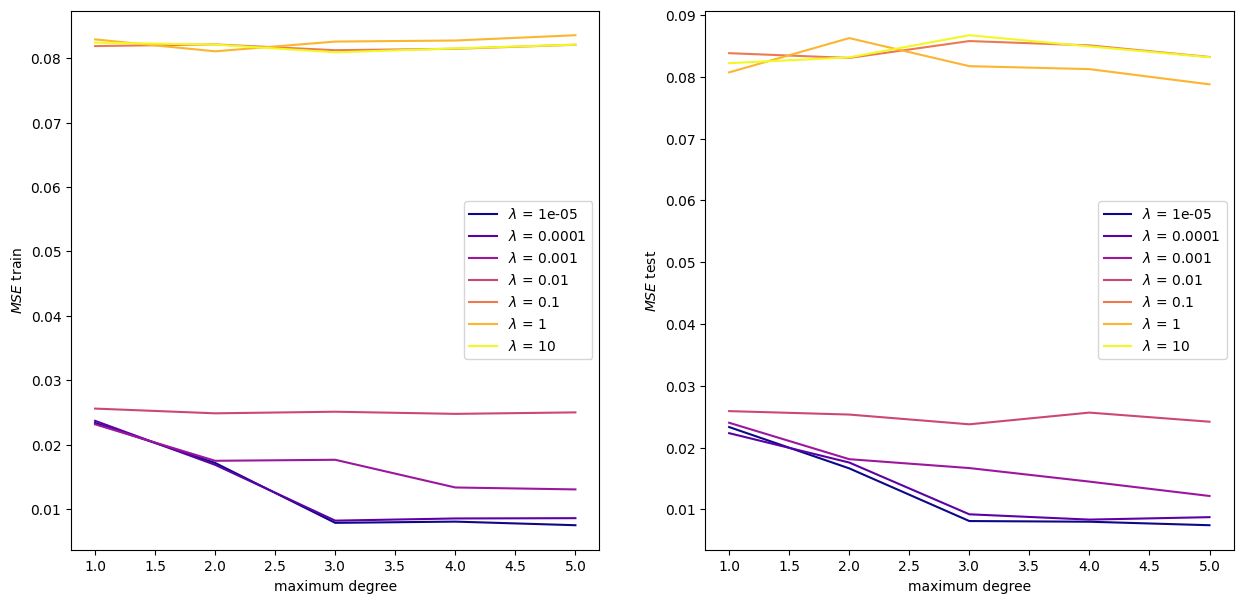

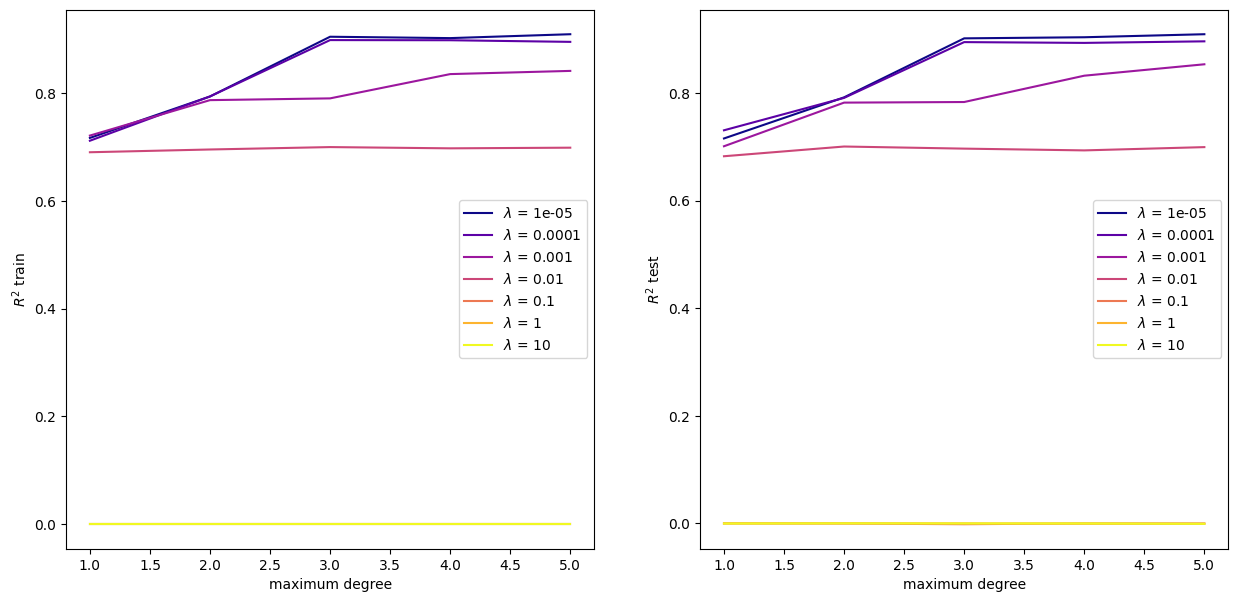

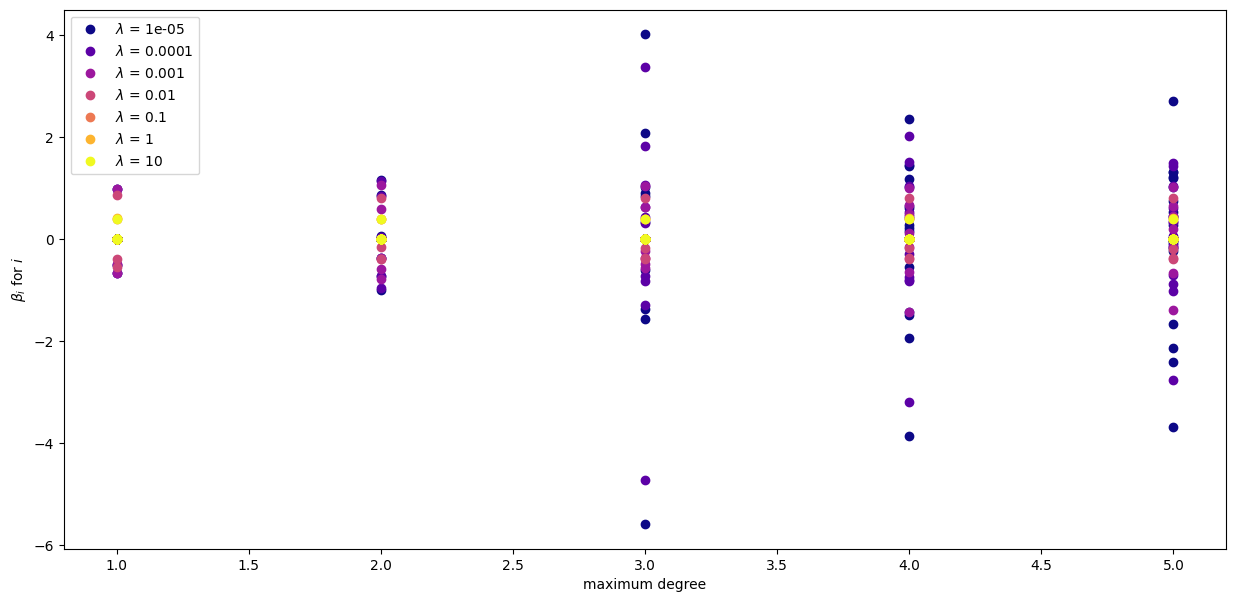

In [55]:
import matplotlib as mpl

# colours for lambdas
cmap = mpl.colormaps['plasma']
# Take colors at regular intervals spanning the colormap.
colors = cmap(np.linspace(0, 1, num_lambdas))

# plot MSE for train, test and lambda values
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
it = 0
for lambd in lambdas:
    axs[0].plot(degrees,MSE_lam[:,0, it], c = colors[it], label=r'$\lambda$ = {}'.format(lambd))
    axs[1].plot(degrees,MSE_lam[:,1, it], c = colors[it], label=r'$\lambda$ = {}'.format(lambd))
    it += 1

axs[0].legend()
axs[1].legend()
axs[0].set(xlabel =r'maximum degree', ylabel= r'$MSE$ train')
axs[1].set(xlabel =r'maximum degree', ylabel= r'$MSE$ test')


# plot R^2 for train and test  and lambda values
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
it = 0
for lambd in lambdas:
    axs[0].plot(degrees,R2_lam[:,0, it], c = colors[it], label=r'$\lambda$ = {}'.format(lambd))
    axs[1].plot(degrees,R2_lam[:,1, it], c = colors[it], label=r'$\lambda$ = {}'.format(lambd))
    it += 1

axs[0].legend()
axs[1].legend()
axs[0].set(xlabel =r'maximum degree', ylabel= r'$R^2$ train')
axs[1].set(xlabel =r'maximum degree', ylabel= r'$R^2$ test')


# TODO THIS IS STILL SHIIIT → MAKE SUBPLOTS FOR EVER LAMBDA !!!!
# plot beta for lambda values
fig = plt.figure(figsize=(15, 7))
axs = plt.gca()
# TODO → get a list that has a colour for each lambda
it = 0
for lambd in lambdas:
    axs.plot(degrees,betas_lam[:,0, it], marker='o', linestyle='', c = colors[it], label=r'$\lambda$ = {}'.format(lambd))
    for i in range(1,X.shape[1]):
        axs.plot(degrees,betas_lam[:,i, it], marker='o', linestyle='', c = colors[it])
    it += 1

axs.legend()

axs.set(xlabel =r'maximum degree', ylabel= r'$\beta_i$ for $i$')

**TODO**:
- analysis !!! wrt noise / no noise & number n



## Part d): Paper and pencil part.

The assumption for linear regression is that there is a continuous function $f$ that and a normal distributed error $\varepsilon \sim \mathcal N(0,\sigma^2)$ so that the data is described by $$y = f(x) + \varepsilon.$$
The continuous part is approximated by $\tilde y$ as $X\beta$ so that $\beta$ minimizes the squared loss.

We show that the expected value of the elements $y_i$ of $y$ is $X_{i,*} \beta$ for $i$ in the range $1, \dots, N$.

Proof:
We have the linear model $y= X\beta + \vec \varepsilon$ for the designmatrix $X$, the parameters $\beta$ and $\varepsilon \sim \mathcal N(0, \sigma^2)$.
So we have $\mathbb E[y_i] = \mathbb E[X_{i,*}\beta + \varepsilon]$ for  $i = 0, \dots, n-1$. Let $p$ denote the number of parameters, then we have 
$$\mathbb E[X_{i,*}\beta + \varepsilon] = \mathbb E[X_{i,*}\beta] +  \mathbb E[\varepsilon] = X_{i,*} \beta + \mathbb E[\varepsilon]$$
because $X_{i,*} \beta$ is non-stochastic.
Then we can use the expeted value of $\varepsilon$, since we know its distribution $$ = X_{i,*} \beta + 0.$$ $\square$



**TODO** :
- copy the rest also over here.

## Part e): Bias-variance trade-off and resampling techniques.


trying to recreate figure 2.11:
As don't achieve typical shape for maximum polynomial degree up to 5, also consider higher degrees

DEGREE = 1


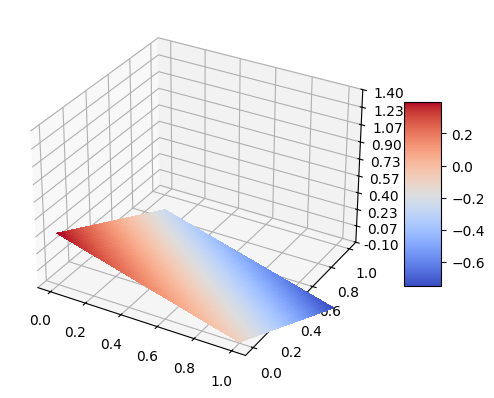

Mean squared error for train: 0.023787256732700563
R^2 score for train:          0.7139007966509054
Mean squared error for test:  0.022403088955515633
R^2 score for test:           0.7213913257706925
summary statistics for train prediction LR
                 0
count  7500.000000
mean      0.408722
std       0.243647
min      -0.175177
25%       0.233255
50%       0.408285
75%       0.587973
max       0.983104
summary statistics for test prediction LR
                 0
count  2500.000000
mean      0.403133
std       0.239573
min      -0.168454
25%       0.226193
50%       0.404802
75%       0.573344
max       0.989826
DEGREE = 2


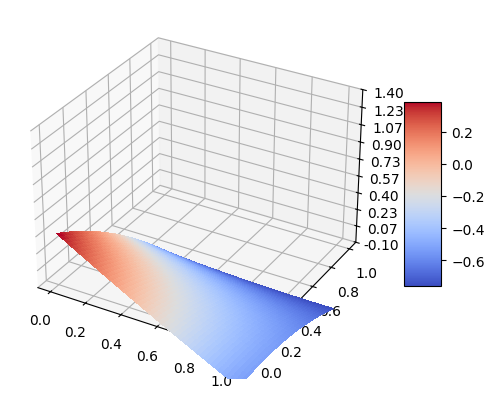

Mean squared error for train: 0.017058198732644168
R^2 score for train:          0.7932757813839771
Mean squared error for test:  0.017365778028717038
R^2 score for test:           0.7892940695324159
summary statistics for train prediction LR
                 0
count  7500.000000
mean      0.405189
std       0.255866
min      -0.008592
25%       0.214252
50%       0.359425
75%       0.573335
max       1.161187
summary statistics for test prediction LR
                 0
count  2500.000000
mean      0.407557
std       0.257749
min      -0.008583
25%       0.209444
50%       0.363073
75%       0.579991
max       1.143556
DEGREE = 3


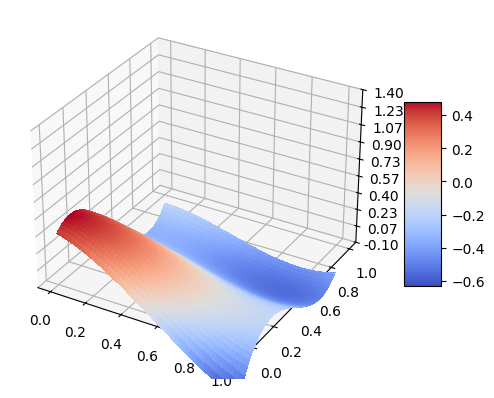

Mean squared error for train: 0.007895860905392677
R^2 score for train:          0.9063378705304418
Mean squared error for test:  0.007916146062804502
R^2 score for test:           0.8972758650823809
summary statistics for train prediction LR
                 0
count  7500.000000
mean      0.405798
std       0.276434
min      -0.096028
25%       0.183352
50%       0.354665
75%       0.594227
max       1.051491
summary statistics for test prediction LR
                 0
count  2500.000000
mean      0.409914
std       0.270184
min      -0.103522
25%       0.194111
50%       0.365632
75%       0.605687
max       1.048408
DEGREE = 4


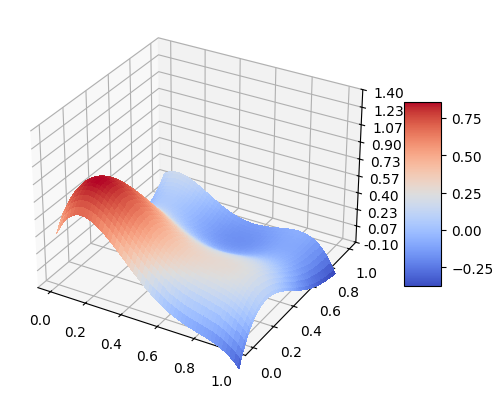

Mean squared error for train: 0.00415362910141961
R^2 score for train:          0.9491371852567949
Mean squared error for test:  0.004231435684776153
R^2 score for test:           0.9501927475920968
summary statistics for train prediction LR
                 0
count  7500.000000
mean      0.404117
std       0.278424
min      -0.164465
25%       0.176548
50%       0.343807
75%       0.558291
max       1.089730
summary statistics for test prediction LR
                 0
count  2500.000000
mean      0.407069
std       0.283011
min      -0.167119
25%       0.176229
50%       0.348650
75%       0.560986
max       1.087591
DEGREE = 5


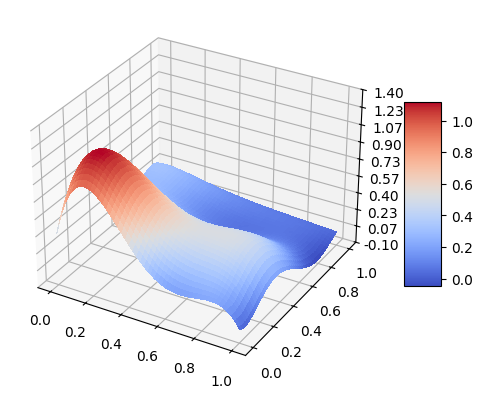

Mean squared error for train: 0.0021982970982252267
R^2 score for train:          0.9730506931764664
Mean squared error for test:  0.002103810528074012
R^2 score for test:           0.975277445583735
summary statistics for train prediction LR
                 0
count  7500.000000
mean      0.401852
std       0.281751
min      -0.033321
25%       0.175256
50%       0.329331
75%       0.541273
max       1.144720
summary statistics for test prediction LR
                 0
count  2500.000000
mean      0.415945
std       0.287582
min      -0.032999
25%       0.181465
50%       0.340834
75%       0.555037
max       1.145625
DEGREE = 6


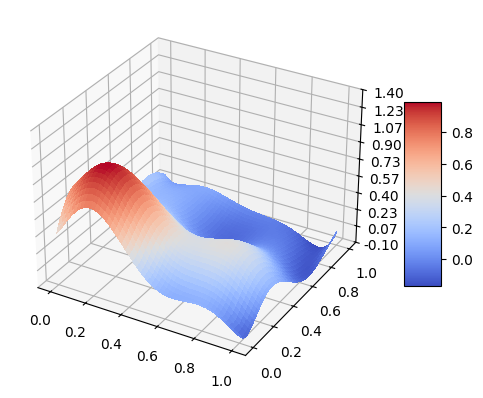

Mean squared error for train: 0.0012705569779956991
R^2 score for train:          0.984780990197302
Mean squared error for test:  0.0012020971271365951
R^2 score for test:           0.9848636717648394
summary statistics for train prediction LR
                 0
count  7500.000000
mean      0.408285
std       0.286749
min      -0.013384
25%       0.177892
50%       0.336712
75%       0.555011
max       1.153159
summary statistics for test prediction LR
                 0
count  2500.000000
mean      0.396165
std       0.280985
min      -0.014321
25%       0.171415
50%       0.329485
75%       0.544222
max       1.153060
DEGREE = 7


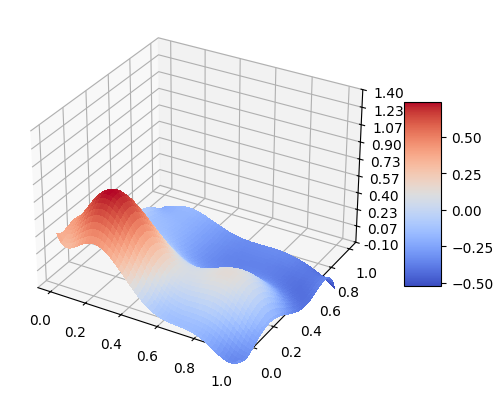

Mean squared error for train: 0.0006703002410361247
R^2 score for train:          0.9919034568870512
Mean squared error for test:  0.0006926417583314922
R^2 score for test:           0.991505108436993
summary statistics for train prediction LR
                 0
count  7500.000000
mean      0.407818
std       0.286582
min      -0.091737
25%       0.175065
50%       0.337421
75%       0.546391
max       1.198236
summary statistics for test prediction LR
                 0
count  2500.000000
mean      0.398083
std       0.284965
min      -0.051324
25%       0.165226
50%       0.328444
75%       0.547152
max       1.197251
DEGREE = 8


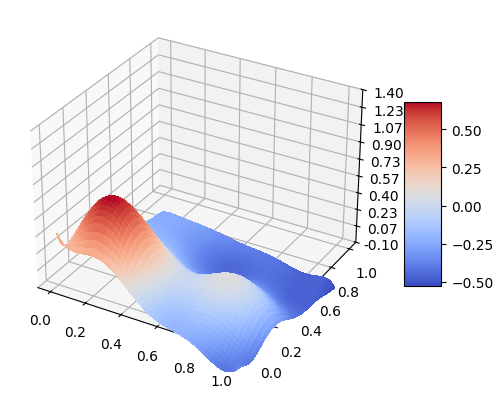

Mean squared error for train: 0.0003983799985357714
R^2 score for train:          0.9952116974614579
Mean squared error for test:  0.0004410691459985371
R^2 score for test:           0.9945096467507771
summary statistics for train prediction LR
                 0
count  7500.000000
mean      0.407222
std       0.287770
min      -0.013654
25%       0.172509
50%       0.340847
75%       0.550946
max       1.210369
summary statistics for test prediction LR
                 0
count  2500.000000
mean      0.400928
std       0.282948
min      -0.004029
25%       0.172736
50%       0.336064
75%       0.537051
max       1.211363
DEGREE = 9


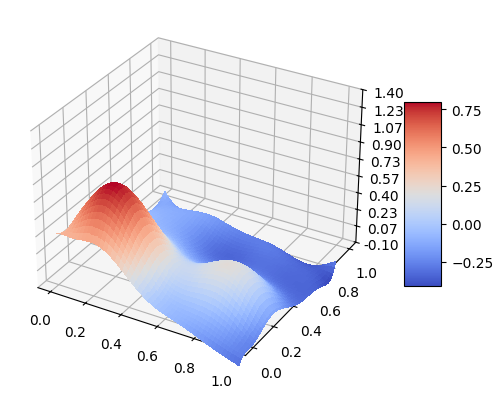

Mean squared error for train: 0.00030786175737808444
R^2 score for train:          0.9962251548903004
Mean squared error for test:  0.000283326943225302
R^2 score for test:           0.9966730166538191
summary statistics for train prediction LR
                 0
count  7500.000000
mean      0.402056
std       0.285079
min      -0.011843
25%       0.170786
50%       0.333564
75%       0.541419
max       1.211838
summary statistics for test prediction LR
                 0
count  2500.000000
mean      0.415137
std       0.291627
min      -0.006146
25%       0.179361
50%       0.344950
75%       0.565184
max       1.210678
DEGREE = 10


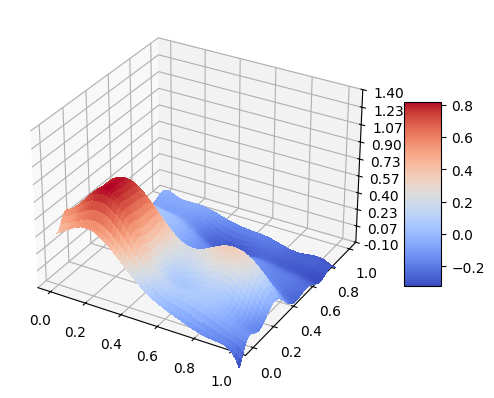

Mean squared error for train: 0.0018382453673166258
R^2 score for train:          0.9775438752639745
Mean squared error for test:  0.0018094787832404848
R^2 score for test:           0.9785451611534948
summary statistics for train prediction LR
                 0
count  7500.000000
mean      0.407524
std       0.288974
min       0.004305
25%       0.186074
50%       0.340022
75%       0.564190
max       1.158526
summary statistics for test prediction LR
                 0
count  2500.000000
mean      0.400923
std       0.294433
min      -0.006560
25%       0.175467
50%       0.328825
75%       0.557789
max       1.158102
DEGREE = 11


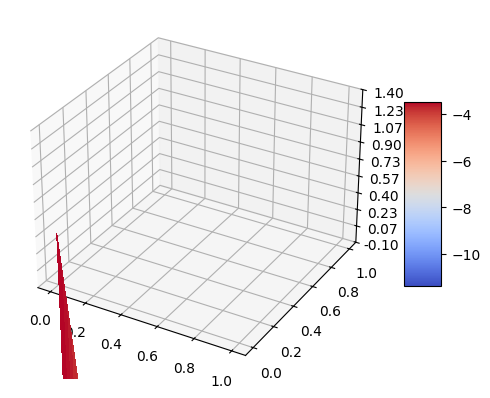

Mean squared error for train: 1.1061070001019544
R^2 score for train:          -12.42724191329987
Mean squared error for test:  1.0993180296305767
R^2 score for test:           -12.272568147359134
summary statistics for train prediction LR
                 0
count  7500.000000
mean      0.404632
std       1.106103
min      -2.742780
25%      -0.206900
50%       0.216431
75%       0.891696
max       9.221615
summary statistics for test prediction LR
                 0
count  2500.000000
mean      0.389902
std       1.092819
min      -2.755987
25%      -0.212197
50%       0.213449
75%       0.886484
max       8.740390


In [490]:
MSE, R2, betas, degrees = OLS_analysis(11)

[Text(0.5, 0, 'maximum degree'), Text(0, 0.5, '$MSE$')]

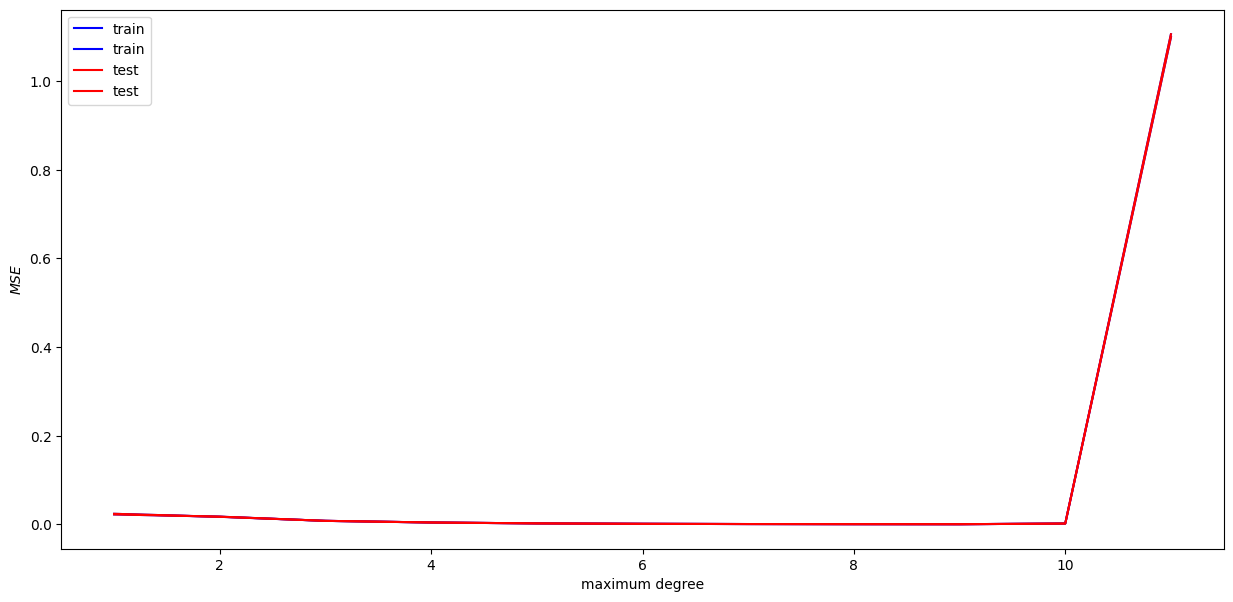

In [491]:
# plot MSE for train, test 
plt.figure(figsize=(15, 7))
axs = plt.gca()

#axs.plot(degrees[:-1],MSE[:-1,0], 'b', label=r'train')
#axs.plot(degrees[:-1],MSE[:-1,1], 'r', label=r'test')

axs.plot(degrees,MSE, 'b', label=r'train')
axs.plot(degrees,MSE, 'r', label=r'test')

axs.legend()
axs.set(xlabel =r'maximum degree', ylabel= r'$MSE$')

NOT WHAT WE WANTED :/// → THE MSE for train does not stay low for larger maximum degree

Now try the bias-varaince- decompostioin with bootstrap

In [537]:
from sklearn.pipeline import make_pipeline

import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.utils import resample

np.random.seed(0)
n = 100
x1 = np.linspace(0, 1, n)
x2 = np.linspace(0, 1, n)
x1m, x2m = np.meshgrid(x1,x2)

y = FrankeFunction(x1m,x2m,0.001) # row ~ x2, column ~ x1



def OLS_analysis_bootstrap(maxdegree):
    degrees = np.arange(1,maxdegree + 1)

    n_boostraps = 100

    ERROR  = np.zeros((maxdegree,2))
    VAR  = np.zeros((maxdegree,2))
    BIAS = np.zeros((maxdegree,2))
        
    num_monoms = int(scipy.special.binom(maxdegree + 2, maxdegree))

    betas = np.zeros((maxdegree, num_monoms)) # for maxdegree = 5: 7 choose 5 is the number of possible monoms up to degree 5 for 2 variables (not -1 because the intercept will be added)
    MSE = np.zeros((maxdegree,2)) # 0.column for train, 1. for test
    R2 = np.zeros((maxdegree,2))
    for degree in degrees:
        print('DEGREE = ' + str(degree))
        degreeplus1 = degree + 1
        X = design_no_in(x1m.flatten(), x2m.flatten(), degreeplus1)

        X_train, X_test, y_train, y_test = train_test_split(X, y.flatten(), test_size=0.2,random_state=20)

        y_pred = np.empty((y_test.shape[0], n_boostraps))
        for i in range(n_boostraps):
            X_t, y_t = resample(X_train, y_train)
            
            X_t_mean = np.mean(X_t, axis=0)
            X_t_scaled = X_t  - X_t_mean
        
            y_t_mean = np.mean(y_t)
            y_t_scaled = y_t - y_t_mean
        
            # in order to use beta for test → test has to be scaled by training means
            X_test_scaled_t = X_test - X_t_mean
            

            

            beta_lin = np.linalg.pinv(X_t_scaled.T @ X_t_scaled) @ X_t_scaled.T @ y_t_scaled # without intercept
            #ypredict_train_LR =  X_train_scaled @ beta_lin + y_train_mean
            y_pred[:,i] = X_test_scaled_t @ beta_lin + y_t_mean
            
            #print('beta = {}'.format(betas[degree-1]))
        y_test_reshaped = y_test.reshape(y_test.shape[0],1)

        error = np.mean( np.mean((y_test_reshaped - y_pred)**2, axis=1, keepdims=True) )
        ERROR[degree -1, 1] = error
        bias = np.mean( (y_test_reshaped - np.mean(y_pred, axis=1, keepdims=True))**2 )
        BIAS[degree -1, 1] = bias
        variance = np.mean( np.var(y_pred, axis=1, keepdims=True) )
        #variance = np.mean( np.var(y_test_reshaped, axis=1, keepdims=True) )
        VAR[degree -1, 1] = variance
        print('Error:', error)
        print('Bias^2:', bias)
        print('Var:', variance)
        print('{} >= {} + {} = {}'.format(error, bias, variance, bias+variance))

    return ERROR, BIAS, VAR, degrees


ERROR, BIAS, VAR, degrees = OLS_analysis_bootstrap(17)

DEGREE = 1
Error: 0.022241583468609584
Bias^2: 0.022231668258159122
Var: 9.915210450465205e-06
0.022241583468609584 >= 0.022231668258159122 + 9.915210450465205e-06 = 0.022241583468609587
DEGREE = 2
Error: 0.01680254702371578
Bias^2: 0.01678974327516085
Var: 1.2803748554933734e-05
0.01680254702371578 >= 0.01678974327516085 + 1.2803748554933734e-05 = 0.01680254702371578
DEGREE = 3
Error: 0.0077004427211784365
Bias^2: 0.0076903141063614615
Var: 1.0128614816973926e-05
0.0077004427211784365 >= 0.0076903141063614615 + 1.0128614816973926e-05 = 0.007700442721178436
DEGREE = 4
Error: 0.004029821463746239
Bias^2: 0.0040212629691874615
Var: 8.558494558776818e-06
0.004029821463746239 >= 0.0040212629691874615 + 8.558494558776818e-06 = 0.004029821463746238
DEGREE = 5
Error: 0.0021418653658860976
Bias^2: 0.0021341324534252287
Var: 7.732912460868974e-06
0.0021418653658860976 >= 0.0021341324534252287 + 7.732912460868974e-06 = 0.0021418653658860976
DEGREE = 6
Error: 0.0011511526537532622
Bias^2: 0.00114

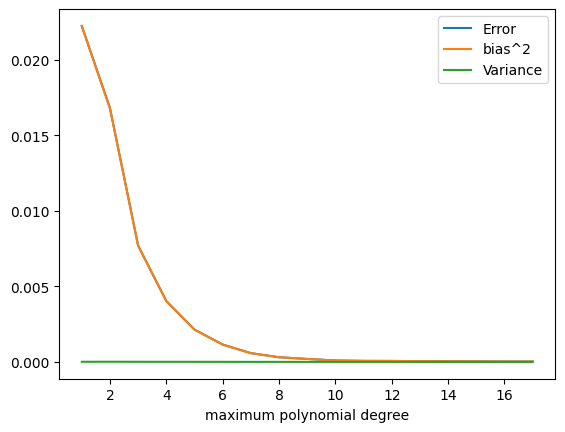

In [538]:
plt.plot(degrees, ERROR[:,1], label='Error')
plt.plot(degrees, BIAS[:,1], label='bias^2')
plt.plot(degrees, VAR[:,1], label='Variance')
plt.xlabel('maximum polynomial degree')
plt.legend()
plt.show()

Repeat THIS for X with intercept column !!! and with splitting outside the degrees loop: → no change still

In [31]:
from sklearn.pipeline import make_pipeline

import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.utils import resample
import scipy

np.random.seed(1)
n = 100
x1 = np.linspace(0, 1, n)
x2 = np.linspace(0, 1, n)
x1m, x2m = np.meshgrid(x1,x2)

y = FrankeFunction(x1m,x2m,0.1) # row ~ x2, column ~ x1

def FrankeFunction(x,y, noise=0):
    term1 = 0.75*np.exp(-(0.25*(9*x-2)**2) - 0.25*((9*y-2)**2))
    term2 = 0.75*np.exp(-((9*x+1)**2)/49.0 - 0.1*(9*y+1))
    term3 = 0.5*np.exp(-(9*x-7)**2/4.0 - 0.25*((9*y-3)**2))
    term4 = -0.2*np.exp(-(9*x-4)**2 - (9*y-7)**2)
    return term1 + term2 + term3 + term4 + noise*np.random.normal(0, 1, (n,n))


def design_with_in(x1f, x2f, degreeplus1):
    n = x1f.size
    num_of_monoms = scipy.special.binom(degreeplus1 + 1, degreeplus1 -1)
    X = np.zeros((n, int(num_of_monoms)))
    c = 0
    for i in range(degreeplus1):
        for j in range(degreeplus1 - i):
            X[:,c] = x1f**i * x2f**j
            #print('{} {}'.format(i,j))
            #print(X[:,c])
            #print('x_1^{} * x_2^{}'.format(i,j)) 
            c += 1
    return X



def OLS_analysis_bootstrap(maxdegree):
    degrees = np.arange(1,maxdegree + 1)

    n_boostraps = 150

    ERROR  = np.zeros(maxdegree)
    VAR  = np.zeros(maxdegree)
    BIAS = np.zeros(maxdegree)
        
    num_monoms = int(scipy.special.binom(maxdegree + 2, maxdegree))

    x = np.array([x1m.flatten(), x2m.flatten()]).T

    x_train, x_test, y_train, y_test = train_test_split(x, y.flatten())#, test_size=0.25)

    for degree in degrees:
        print('DEGREE = ' + str(degree))
        degreeplus1 = degree + 1

        x1f = x_train[:,0]
        x2f = x_train[:,1]
        X_train = design_with_in(x1f, x2f, degreeplus1)


        x1f = x_test[:,0]
        x2f = x_test[:,1]
        X_test = design_with_in(x1f, x2f, degreeplus1)

        y_test_reshaped = y_test.reshape(y_test.shape[0],1)
        y_pred = np.empty((y_test.shape[0], n_boostraps))
        for i in range(n_boostraps):
            X_t, y_t = resample(X_train, y_train,replace=True)

            beta_lin = np.linalg.pinv(X_t.T @ X_t) @ X_t.T @ y_t # without intercept
            y_pred[:,i] = X_test @ beta_lin 

            #print(mses[-1])
            
            
            #print('beta = {}'.format(betas[degree-1]))
        
        error = np.mean(np.mean((y_test_reshaped - y_pred)**2, axis=0, keepdims=True)) 
        '''
        error = np.mean( np.mean((y_test_reshaped - y_pred)**2, axis=1, keepdims=True) )
        
        
        mse = []
        for i in range(n_boostraps):
            mse.append(mean_squared_error(y_test, y_pred[:,i]))
        error = np.mean(mse)
        '''
        
        ERROR[degree -1] = error
        biass = np.mean( (y_test_reshaped - np.mean(y_pred, axis=1, keepdims=True))**2 )
        #biass = bias(y_test_reshaped, y_pred)
        
        BIAS[degree -1] = biass

        variance = np.mean( np.var(y_pred, axis=1, keepdims=True) )

        VAR[degree -1] = variance
        print('Error:', ERROR[degree -1])
        print('Bias^2:', biass)
        print('Var:', variance)
        print('{} >= {} + {} = {}'.format(ERROR[degree -1], biass, variance, biass+variance))

    return ERROR, BIAS, VAR, degrees


ERROR, BIAS, VAR, degrees = OLS_analysis_bootstrap(10)

DEGREE = 1
Error: 0.03343142726277074
Bias^2: 0.033417286428777344
Var: 1.4140833993406394e-05
0.03343142726277074 >= 0.033417286428777344 + 1.4140833993406394e-05 = 0.03343142726277075
DEGREE = 2
Error: 0.027159012368727975
Bias^2: 0.02713806984958376
Var: 2.094251914421625e-05
0.027159012368727975 >= 0.02713806984958376 + 2.094251914421625e-05 = 0.027159012368727975
DEGREE = 3
Error: 0.01799968474693051
Bias^2: 0.017974829493754407
Var: 2.485525317610019e-05
0.01799968474693051 >= 0.017974829493754407 + 2.485525317610019e-05 = 0.017999684746930505
DEGREE = 4
Error: 0.014244814687034386
Bias^2: 0.014215965305623314
Var: 2.8849381411072743e-05
0.014244814687034386 >= 0.014215965305623314 + 2.8849381411072743e-05 = 0.014244814687034386
DEGREE = 5
Error: 0.011995794543475817
Bias^2: 0.01195943249607728
Var: 3.636204739853994e-05
0.011995794543475817 >= 0.01195943249607728 + 3.636204739853994e-05 = 0.01199579454347582
DEGREE = 6
Error: 0.011007614283045013
Bias^2: 0.010966572412075678
Var

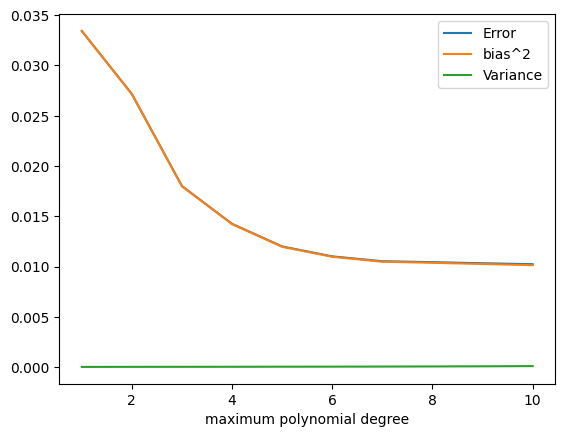

In [32]:
plt.plot(degrees, ERROR[:], label='Error')
plt.plot(degrees, BIAS[:], label='bias^2')
plt.plot(degrees, VAR[:], label='Variance')
plt.xlabel('maximum polynomial degree')
plt.legend()
plt.show()